In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
# read the data
data = pd.read_csv("Titanic_train.csv")

# 1. Data Exploration:

In [5]:
# check the number of rows and columns
data.shape

(891, 12)

In [6]:
# check the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# it seems there as null values in cabin

In [8]:
# check the last 5 rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# by last 5 rows we can known that cabin has null values

In [10]:
# summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# from shape attribute we knew 891 observations are there in dataset. Here age column has only 714 count we can infere null values are present in age
# by looking fare column median, mean, third quartile and max we can conclude outliers are present toward upper bound. Because max value is far

In [12]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# 5 object data types are present one-hot encoding need to apply to convert string data to numerical data

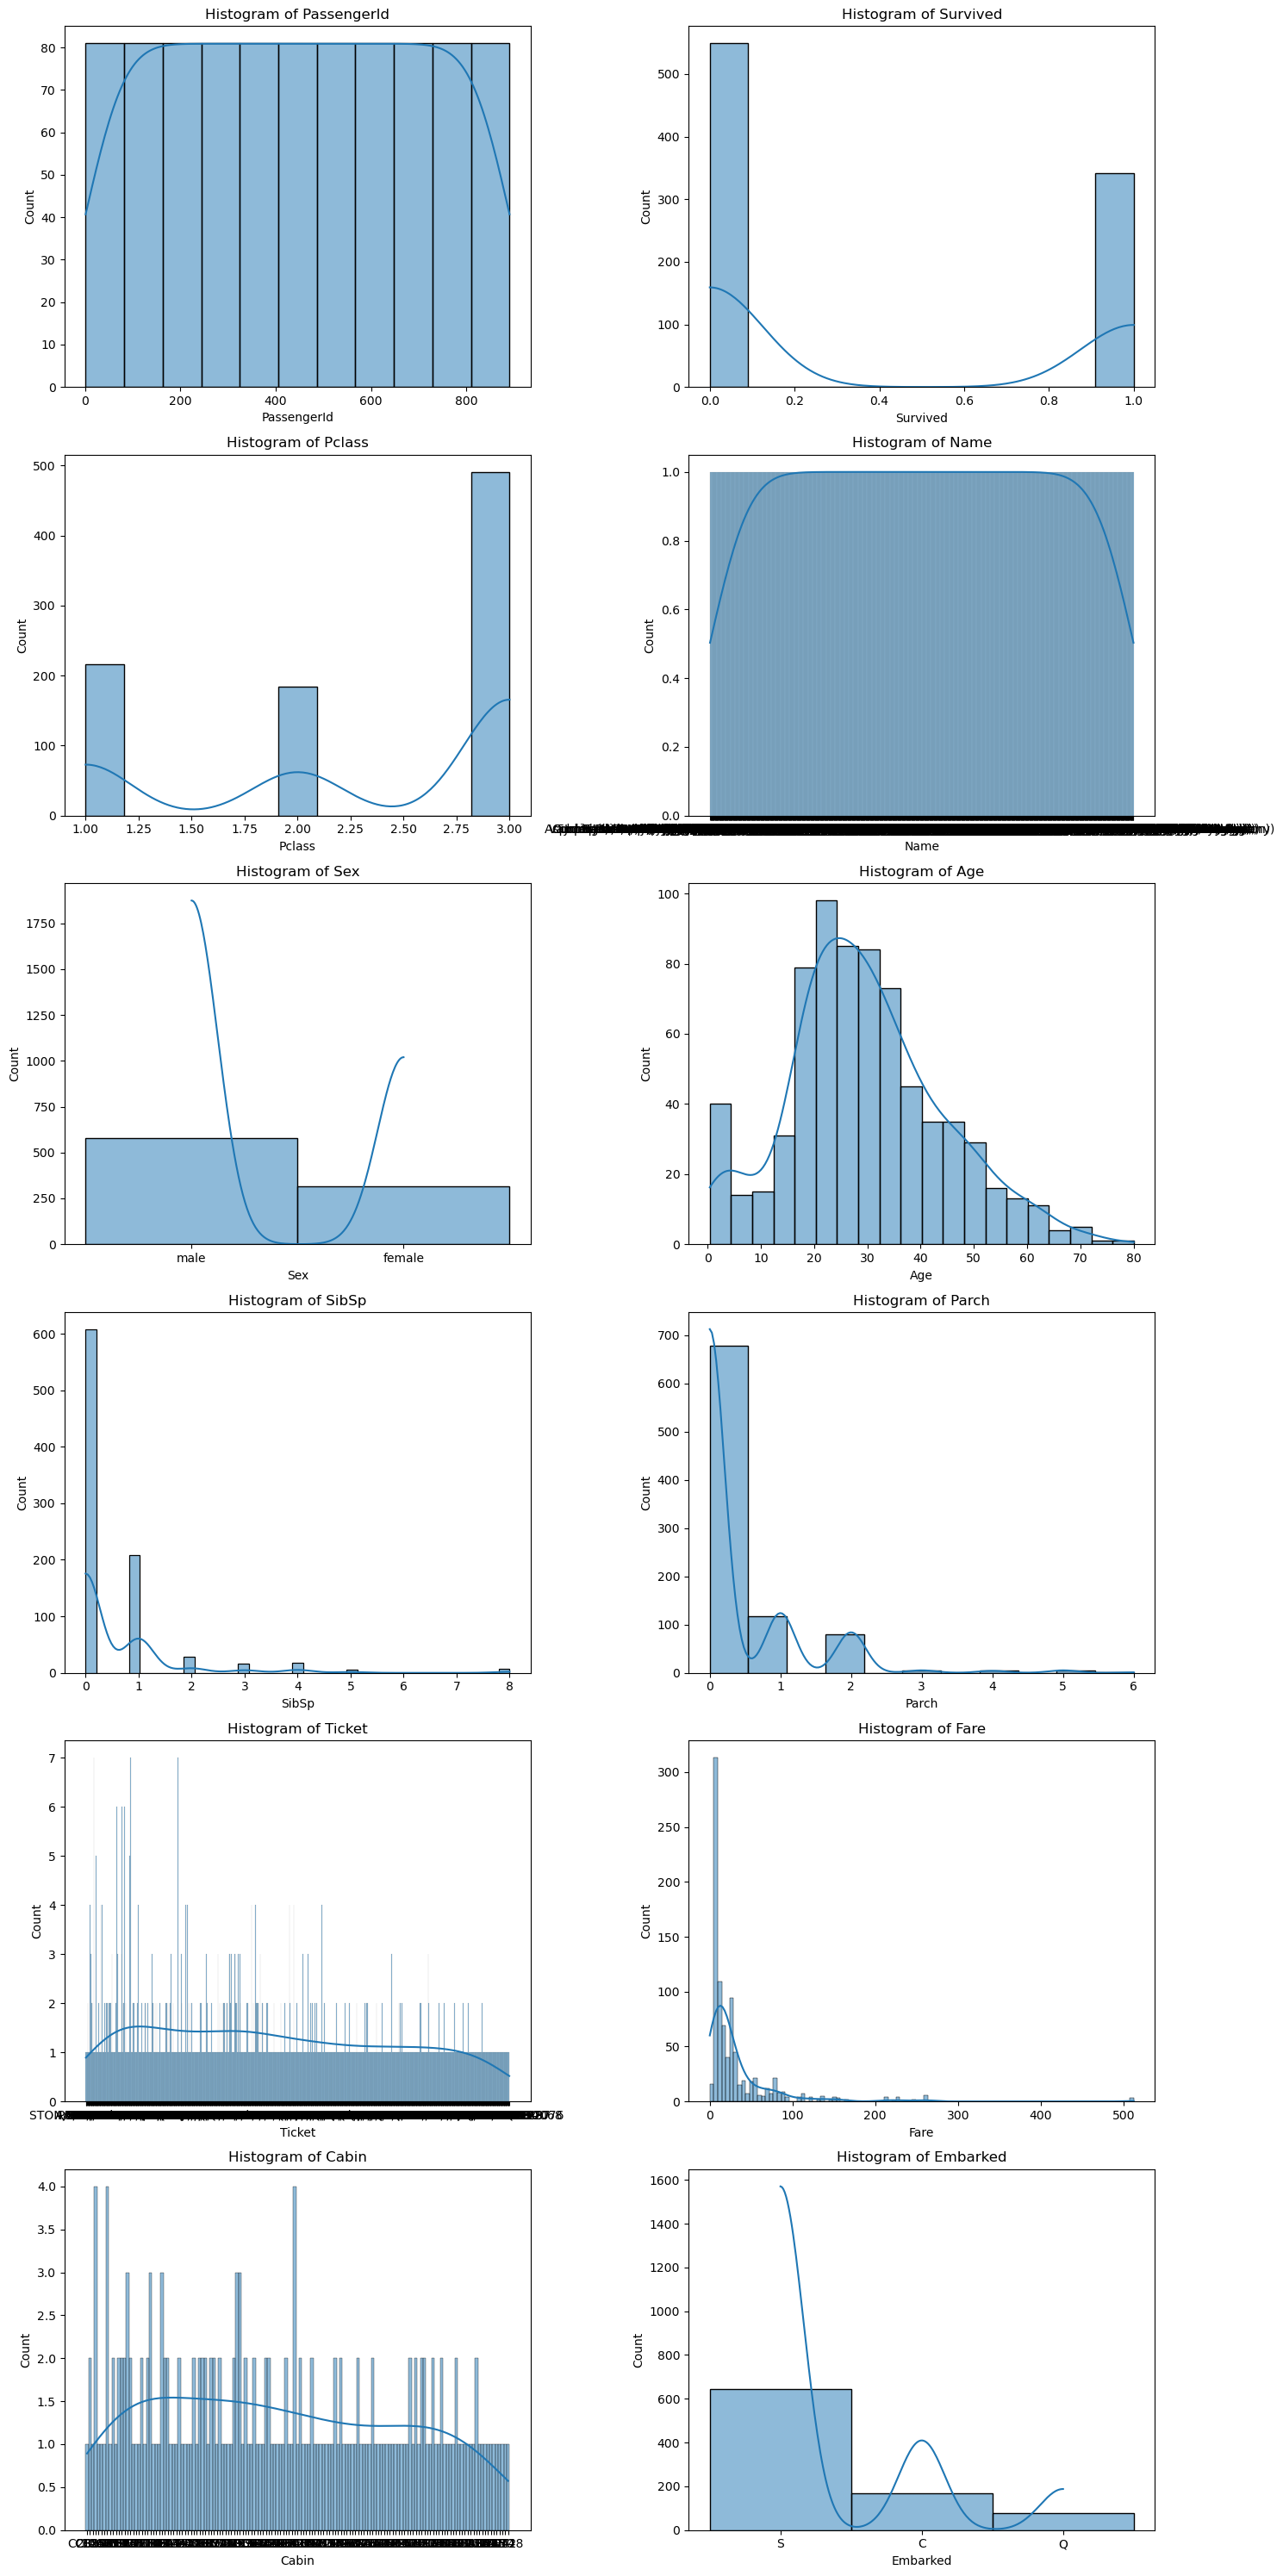

In [14]:
# histogram for all variables
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.histplot(data=data, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [15]:
# most of the people are not survived compare with survived
# people from passenger class 3 are the highest where 2 are the lowest
# male are more than female who are travelling
# most of the people age are in the range 20 to 35
# people with no sibling or spouse are more and with highest siblings and spouse are 8
# parent and child highest count is 6

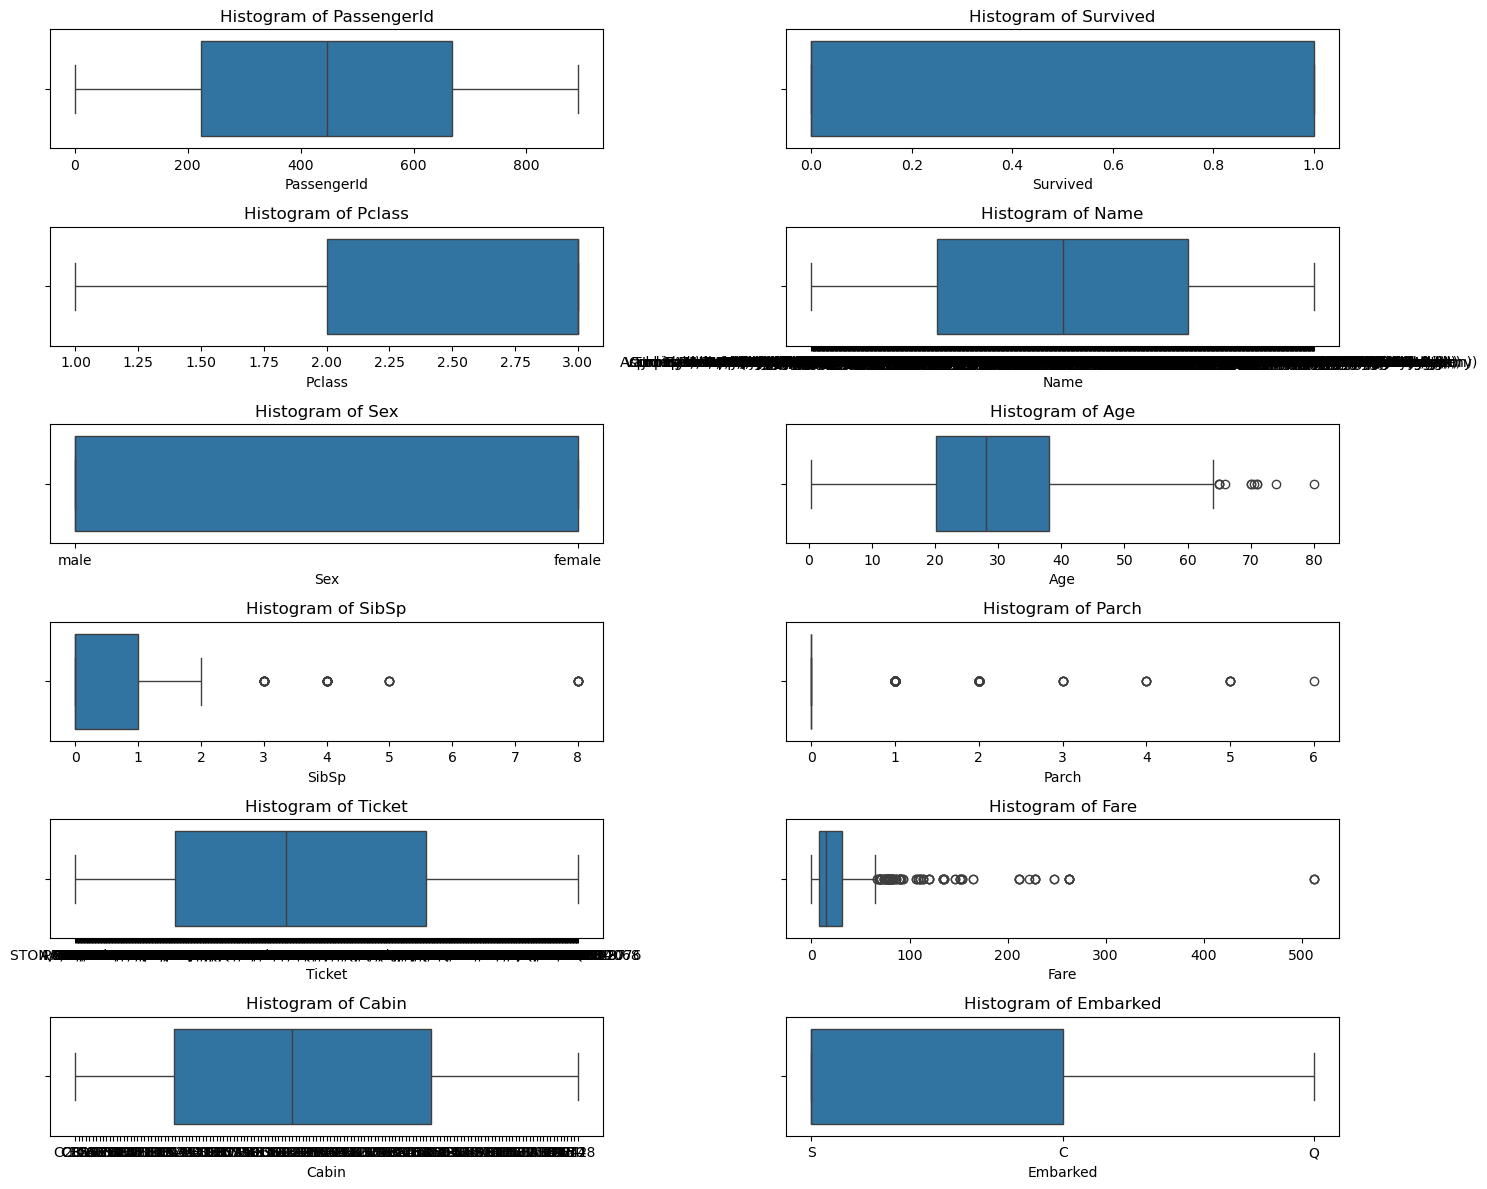

In [16]:
# boxplot for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [17]:
# outliers are present in age, sibling, spouse, and Fare but all are realistic values but as per distribution they are looking as outliers

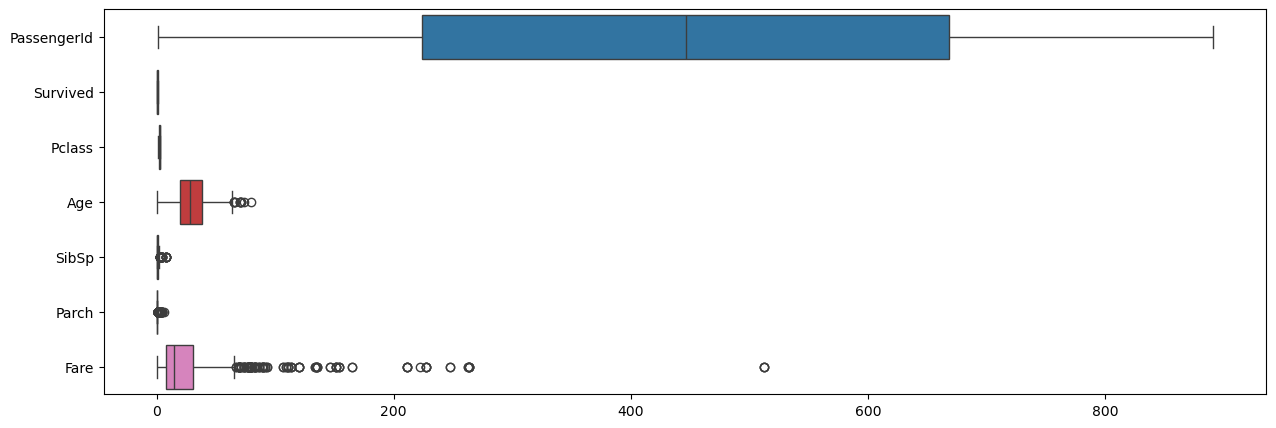

In [18]:
# boxplot for all variables
fig = plt.figure(figsize=(15,5))
sns.boxplot(data=data, orient='h')
plt.show()

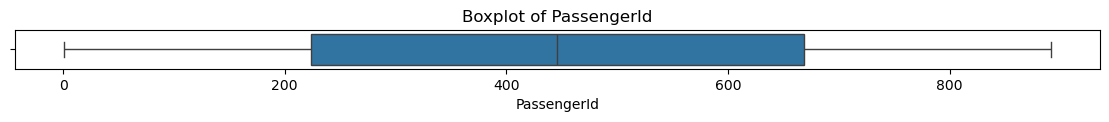

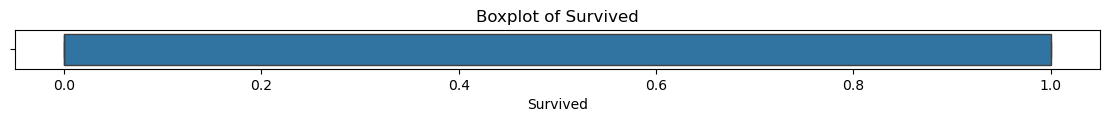

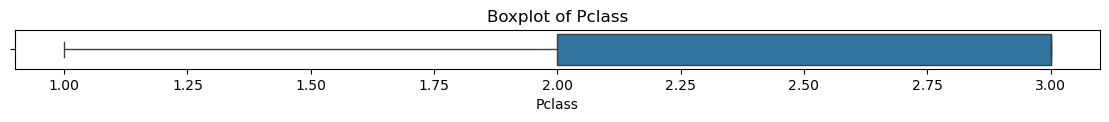

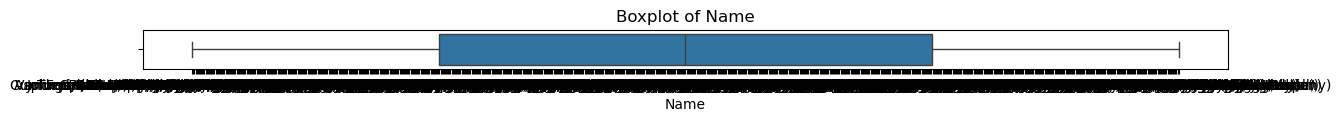

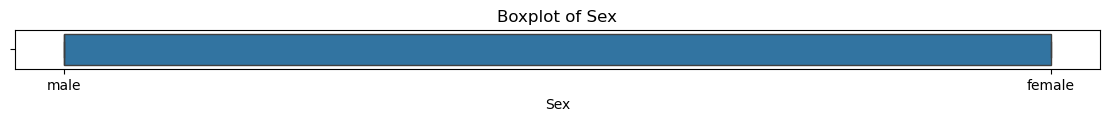

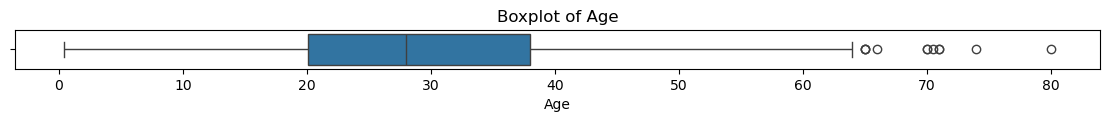

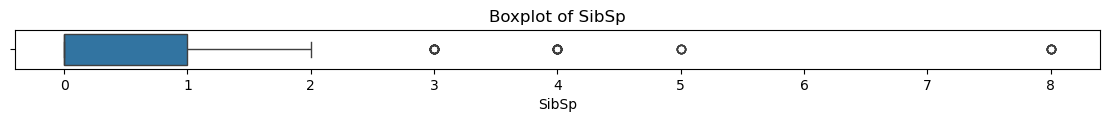

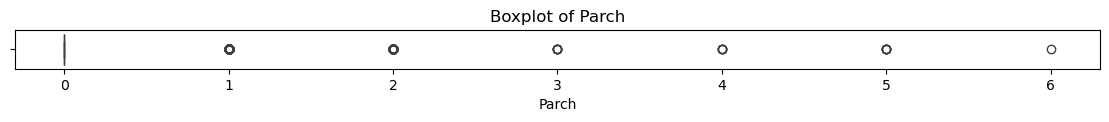

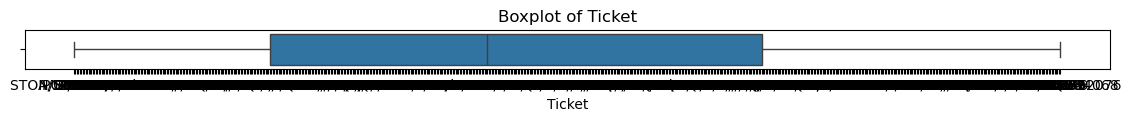

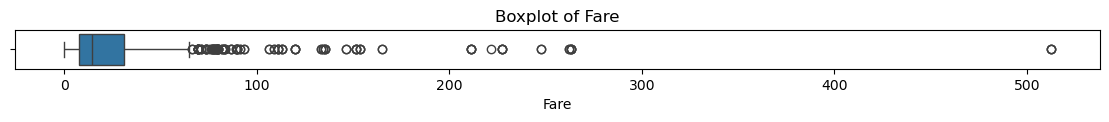

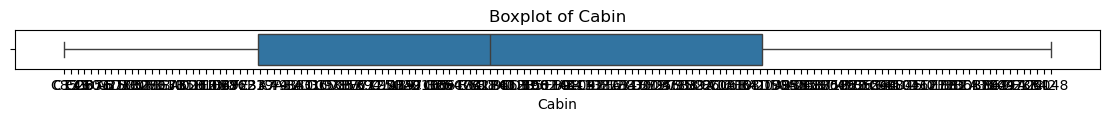

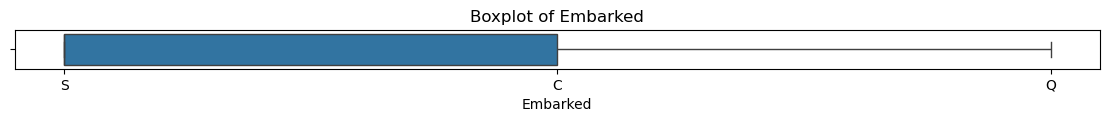

In [19]:
# boxplot for individual column
for column in data.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

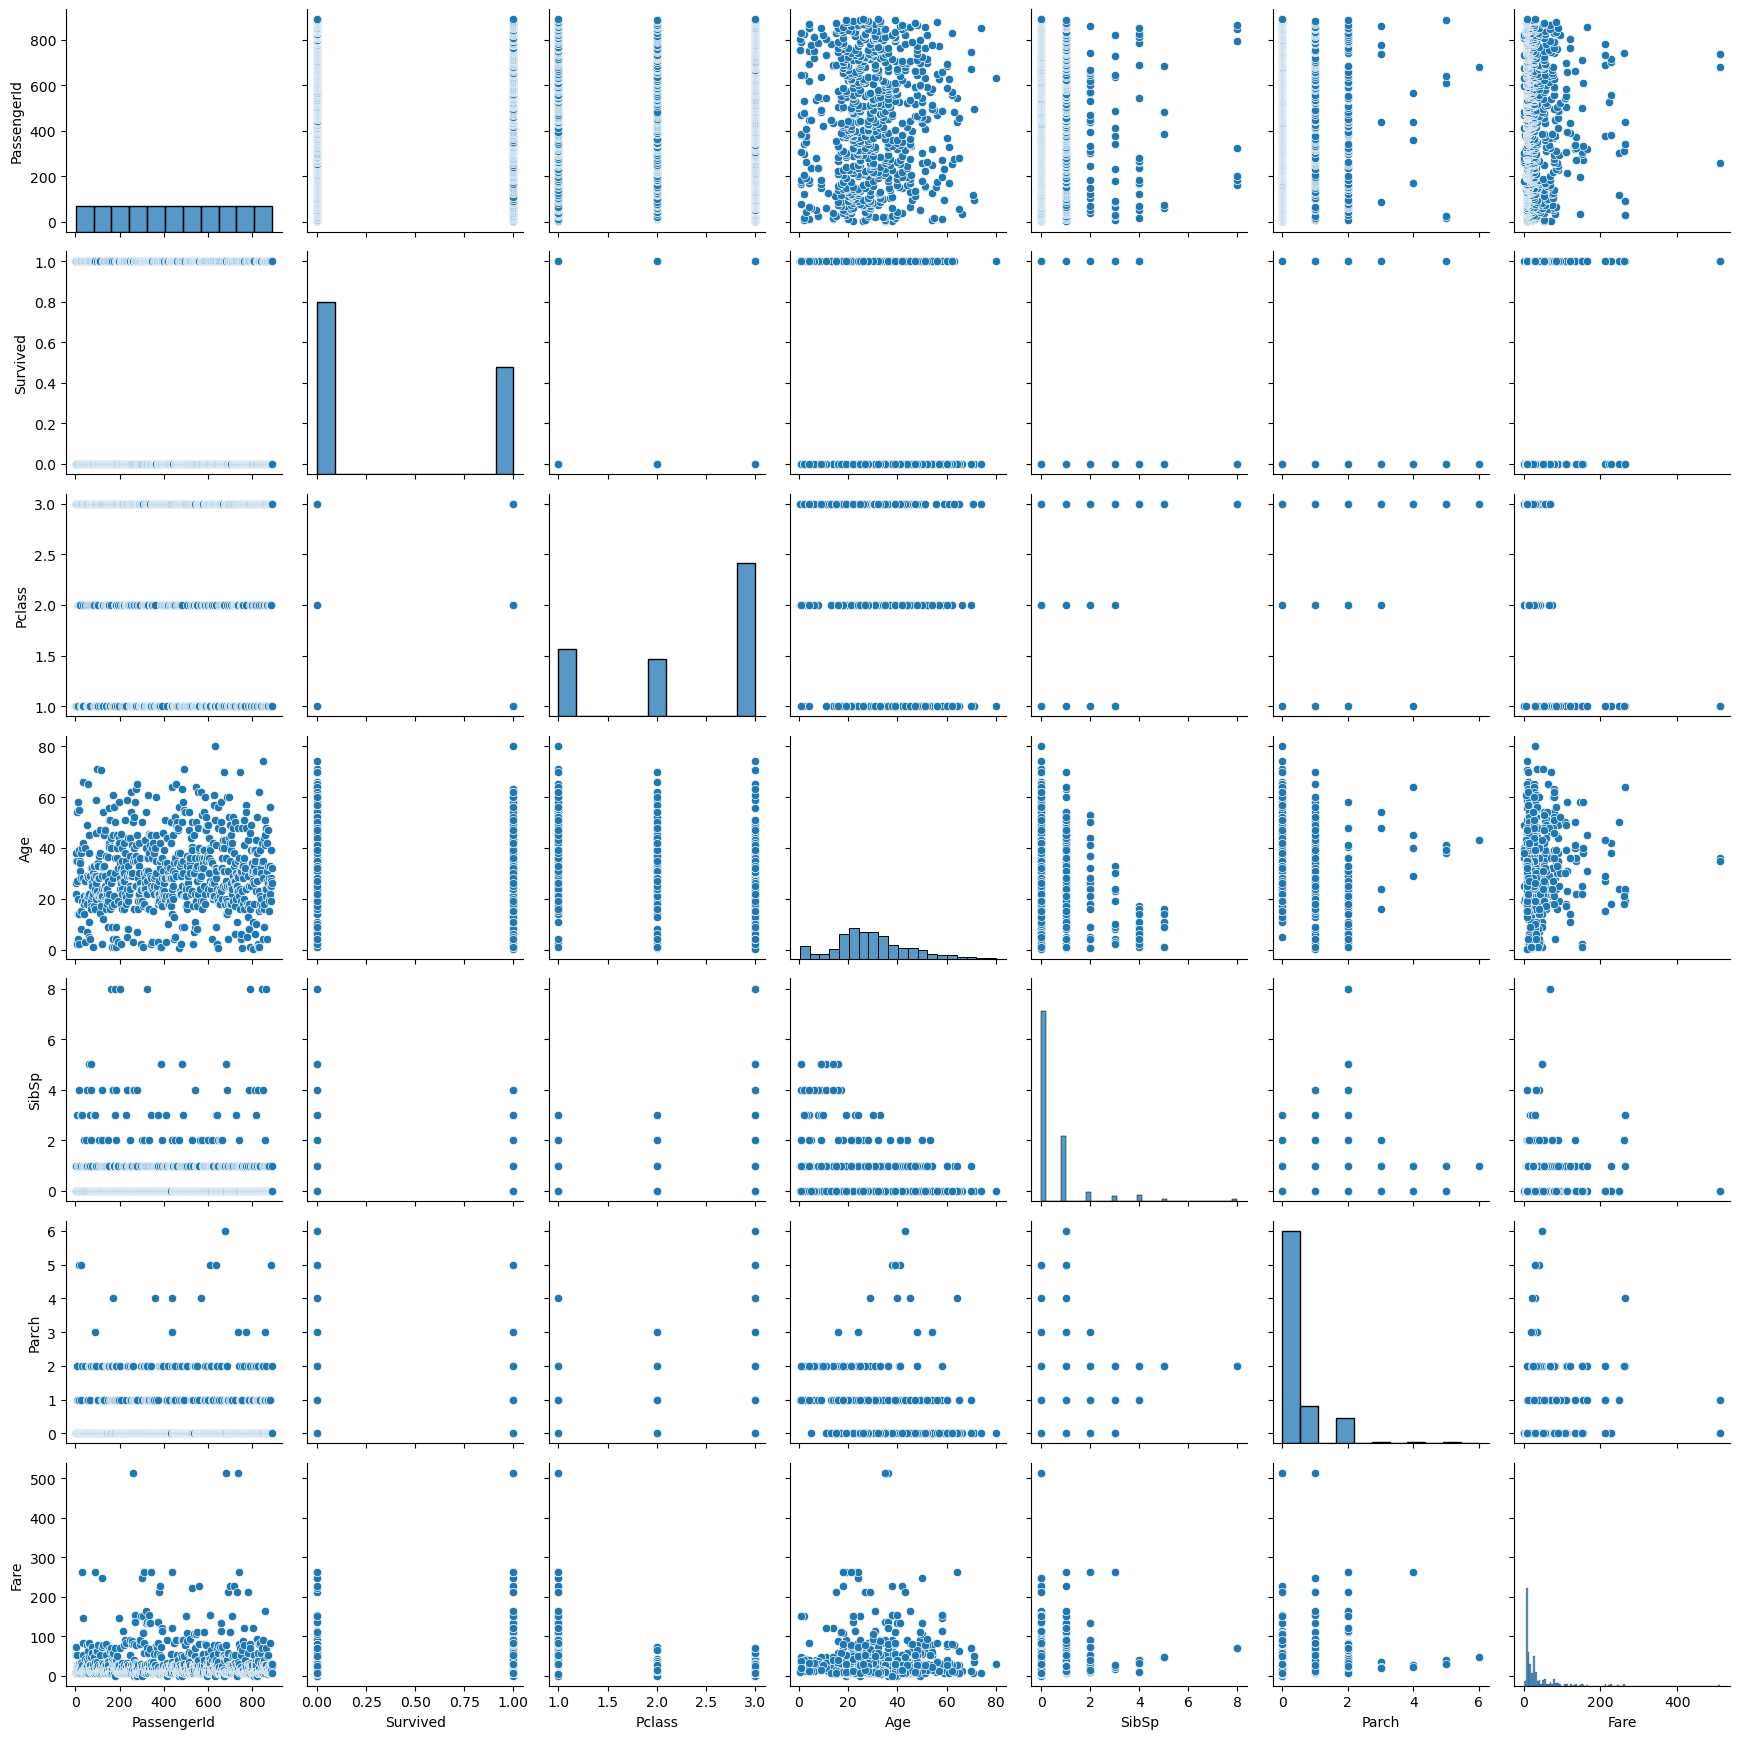

In [20]:
# pairplot to see relation between each variable
sns.pairplot(data=data)
plt.tight_layout()
plt.show()

In [21]:
# correlation matrix
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
# correlation of survived with all other variables where fare has the highest but it is weak positive correlation and pclass with negative weak
# correlation
data.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

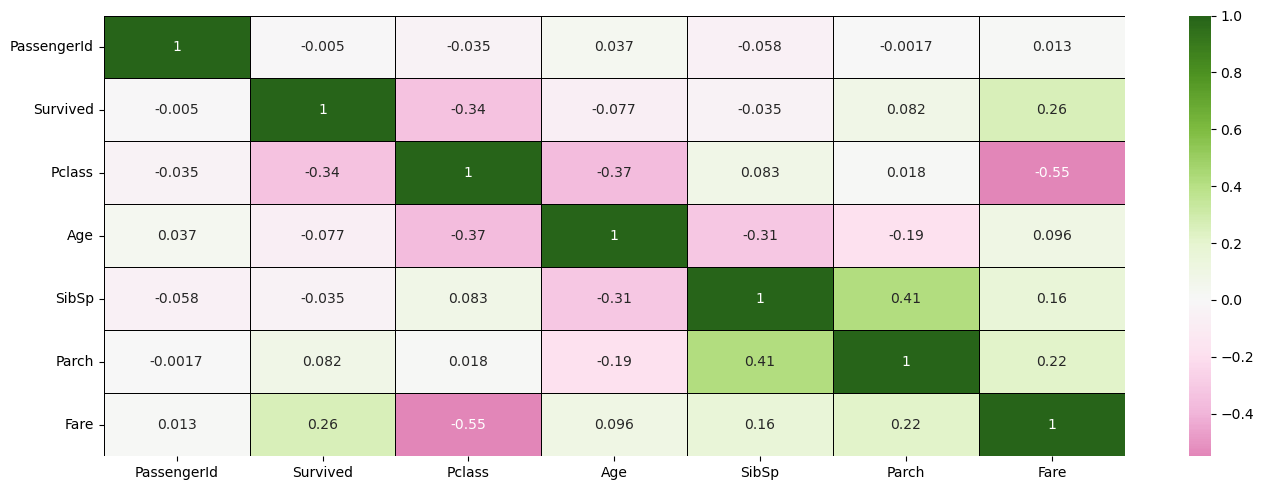

In [23]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=data.corr(numeric_only=True),cmap='PiYG',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.show()

In [24]:
# survived has highest correlation with Pclass but it is weak negative correlation
# survived has highest positive weak correlation with Fare.
# higehst correlation is between Pclass and and Fare but it is negative moderate correlation
# second highest correlation is between SibSp and Parch but it is positive moderate correlation
# we can conclude survival chances are high for people who paid high Fare
# survival chances are less for people from Pclass 3

# 2. Data Preprocessing:

In [26]:
# checking for duplicated values
data.duplicated().sum()

0

In [27]:
# checking missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
print("Cabin:",(687/data.shape[0]) * 100)
print("Age:",(177/data.shape[0]) * 100)
print("Embarked:",(2/data.shape[0]) * 100)

Cabin: 77.10437710437711
Age: 19.865319865319865
Embarked: 0.22446689113355783


In [29]:
# age, cabin and embarked has missing values
# cabin has many missing values with more than 77 percentage we can drop the column
# since dataset is small and age missing values less than 20 percentage so we can impute
# Embarked only values so we can impute
# PassengerId, Name, Ticket won't help in predicting so we will drop these columns also

In [30]:
# dropping the columns which are not useful
data.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

In [31]:
# imputing age with median value
data['Age'] = data['Age'].fillna(data['Age'].median())

In [32]:
# imputing Embarked with mode value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [33]:
# checking datatype to convert categorical variables to numerical variables
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [34]:
# Sex and Emabarked are string datatype need to convert to numerical varible by using one-hot encoding

In [35]:
# applying one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True, dtype='int64')

In [36]:
# checking the dataset
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
# checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [38]:
# now all datatypes are numerical

# Preprocessing the test data

In [40]:
# read test dataset
data_test = pd.read_csv("Titanic_test.csv")

In [41]:
# check the number of rows and columns
data_test.shape

(418, 11)

In [42]:
# check first 5 rows
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
# check data type
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [44]:
# check duplicate observations
data_test.duplicated().sum()

0

In [45]:
# check null values
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
# dropping the columns which are not useful
data_test.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

In [47]:
# imputing age with median value
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].median())

In [48]:
# imputing Embarked with mode value
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].median())

In [49]:
# applying one-hot encoding
data_test = pd.get_dummies(data_test, columns=['Sex', 'Embarked'], drop_first=True, dtype='int64')

In [50]:
# check dataset after one-hot encoding
data_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


In [51]:
# save the cleaned test dataset
data_test.to_csv("Titanic_test_cleaned.csv", index=False)

# 3. Model Building:

In [53]:
# seperate independent variables
X = data.iloc[:,1:]

In [54]:
# seperate target variable
y = data.iloc[:,0]

In [55]:
# split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# import logistic regression library
from sklearn.linear_model import LogisticRegression

In [57]:
# create the logistic regression object
logistic_regression = LogisticRegression()

In [58]:
# train on train data
logistic_regression.fit(X_train, y_train)

C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 4. Model Evaluation:

In [60]:
# predict survived on test data
y_pred = logistic_regression.predict(X_test)

In [61]:
# check classification report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [62]:
# import and check roc_auc_score and roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y_test,logistic_regression.predict(X_test))
Logit_roc_score

0.7886743886743887

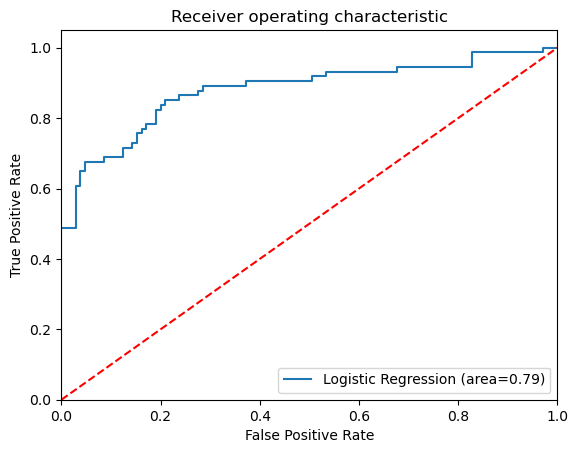

In [63]:
# roc_curve
fpr, tpr, thresholds = roc_curve(y_test,logistic_regression.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 5. Interpretation:

In [65]:
# interpret the coefficient
logistic_regression.coef_

array([[-9.75385933e-01, -3.06786233e-02, -2.92940400e-01,
        -1.05913363e-01,  2.53592927e-03, -2.59398704e+00,
         1.23601759e-01, -3.20429349e-01]])

In [66]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [67]:
# create dataframe to check the variable and respective coefficient
coefficient = pd.DataFrame(data=logistic_regression.coef_.T, index=X.columns, columns=['coefficients'])

In [68]:
coefficient

,coefficients
Pclass,-0.975386
Age,-0.030679
SibSp,-0.292940
Parch,-0.105913
Fare,0.002536
Sex_male,-2.593987
Embarked_Q,0.123602
Embarked_S,-0.320429


In [69]:
# sort in descending order of coefficient
coefficient.abs().sort_values(by='coefficients', ascending=False)

,coefficients
Sex_male,2.593987
Pclass,0.975386
Embarked_S,0.320429
SibSp,0.292940
Embarked_Q,0.123602
Parch,0.105913
Age,0.030679
Fare,0.002536


In [70]:
# Sex column plays significant role in predicting the target variable survival probability followed by Pclass
# Fare and Age are the least significance

# 6. Deployment with Streamlit:

In [175]:
from pickle import dump

In [179]:
# Save the model to local disk
dump(logistic_regression,open("Logistic_Regression_Model.sav", "wb"))